In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Read in the globalsystem2 results as csv, with `dtype=np.float32` in order to aid with loading in

In [51]:
df = pd.read_csv('../../data/openmodelica/NOAA_10yr_reduced.csv', dtype=np.float32)
print(df.shape)

(576210, 9)


In [52]:
df_new = df.drop_duplicates(subset='time')
print(df_new.shape)

(246832, 9)


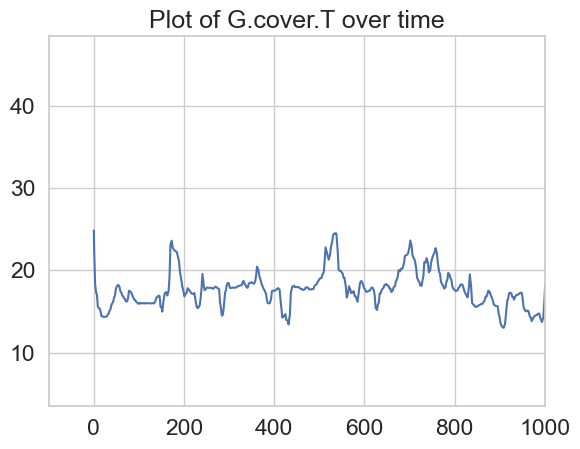

In [53]:
plt.plot(df_new['G.air.T'] - 273.15)
plt.xlim([-100,1000])
plt.title('Plot of G.cover.T over time')
plt.show()#plt.savefig('../imgs/abnormalities.png')

In [50]:
cols_to_keep = []
for col in df_new.columns:
    if df_new[col].nunique() > 1:
        cols_to_keep.append(col)

In [ ]:
df_new.to_csv('../../data/openmodelica/testglobalsystem2_res_dropped.csv')

In [33]:
df_new = pd.read_csv('../data/testglobalsystem2_res_dropped.csv', usecols=cols_to_keep)

FileNotFoundError: [Errno 2] No such file or directory: '../data/testglobalsystem2_res_dropped.csv'

In [24]:
df_new = df_new.drop(columns='Unnamed: 0')
print(df_new.shape)
print(df_new.head())

(96732, 2939)
         time  CHP.fluid.h     E_amb_TES  E_el_buy  G.CO2_air.CO2  \
0    0.000000   2092000.00  0.000000e+00       0.0      1940.0000   
1   59.471302    129782.12  3.517455e-21       0.0      1466.9448   
2   60.000000    129710.63  5.939979e-21       0.0      1464.2437   
3  240.000000    157395.55 -4.640570e-18       0.0      1023.8505   
4  300.000000    166805.78 -1.973970e-17       0.0       977.9299   

   G.CO2_top.CO2  G.E_th_tot_kWhm2  G.PID_CO2.I  G.PID_Mdot.I  \
0      1940.0000          0.000000     1.250000      0.714286   
1      1478.9320          0.003939     1.322455      0.647800   
2      1476.0664          0.003976     1.419609      0.647358   
3      1027.2251          0.016742     2.500000      0.774613   
4       979.5965          0.021026     2.500000      0.836845   

   G.Q_cd_Soil.Layer_c[1].T  ...  G.SC.T3b.condition  G.SC.T3c.condition  \
0                 288.15000  ...                 0.0                 0.0   
1                 288.17136 

drop initial hours due to abnormalities during initialisation

In [25]:
df_new = df_new.iloc[2:]

In [26]:
print(df_new.isna().sum().sort_values())
df_new = df_new.drop(columns=['HP.h_ex_ev','HP.Exhaust_ev.h_outflow'])

time                                       0
TES.Summary.T_profile.Twf[9]               0
TES.Summary.T_profile.Twf[10]              0
TES.Summary.T_profile.Twf[11]              0
TES.Summary.T_profile.Twf[12]              0
                                       ...  
TES.flow1Dim.Cells[8].InFlow.m_flow        0
TES.cell1DimInc_hx[13].qdot_hx             0
controller.T2.condition                    0
HP.h_ex_ev                             96692
HP.Exhaust_ev.h_outflow                96692
Length: 2939, dtype: int64


In [12]:
print(df_new.isna().sum().sum())

0


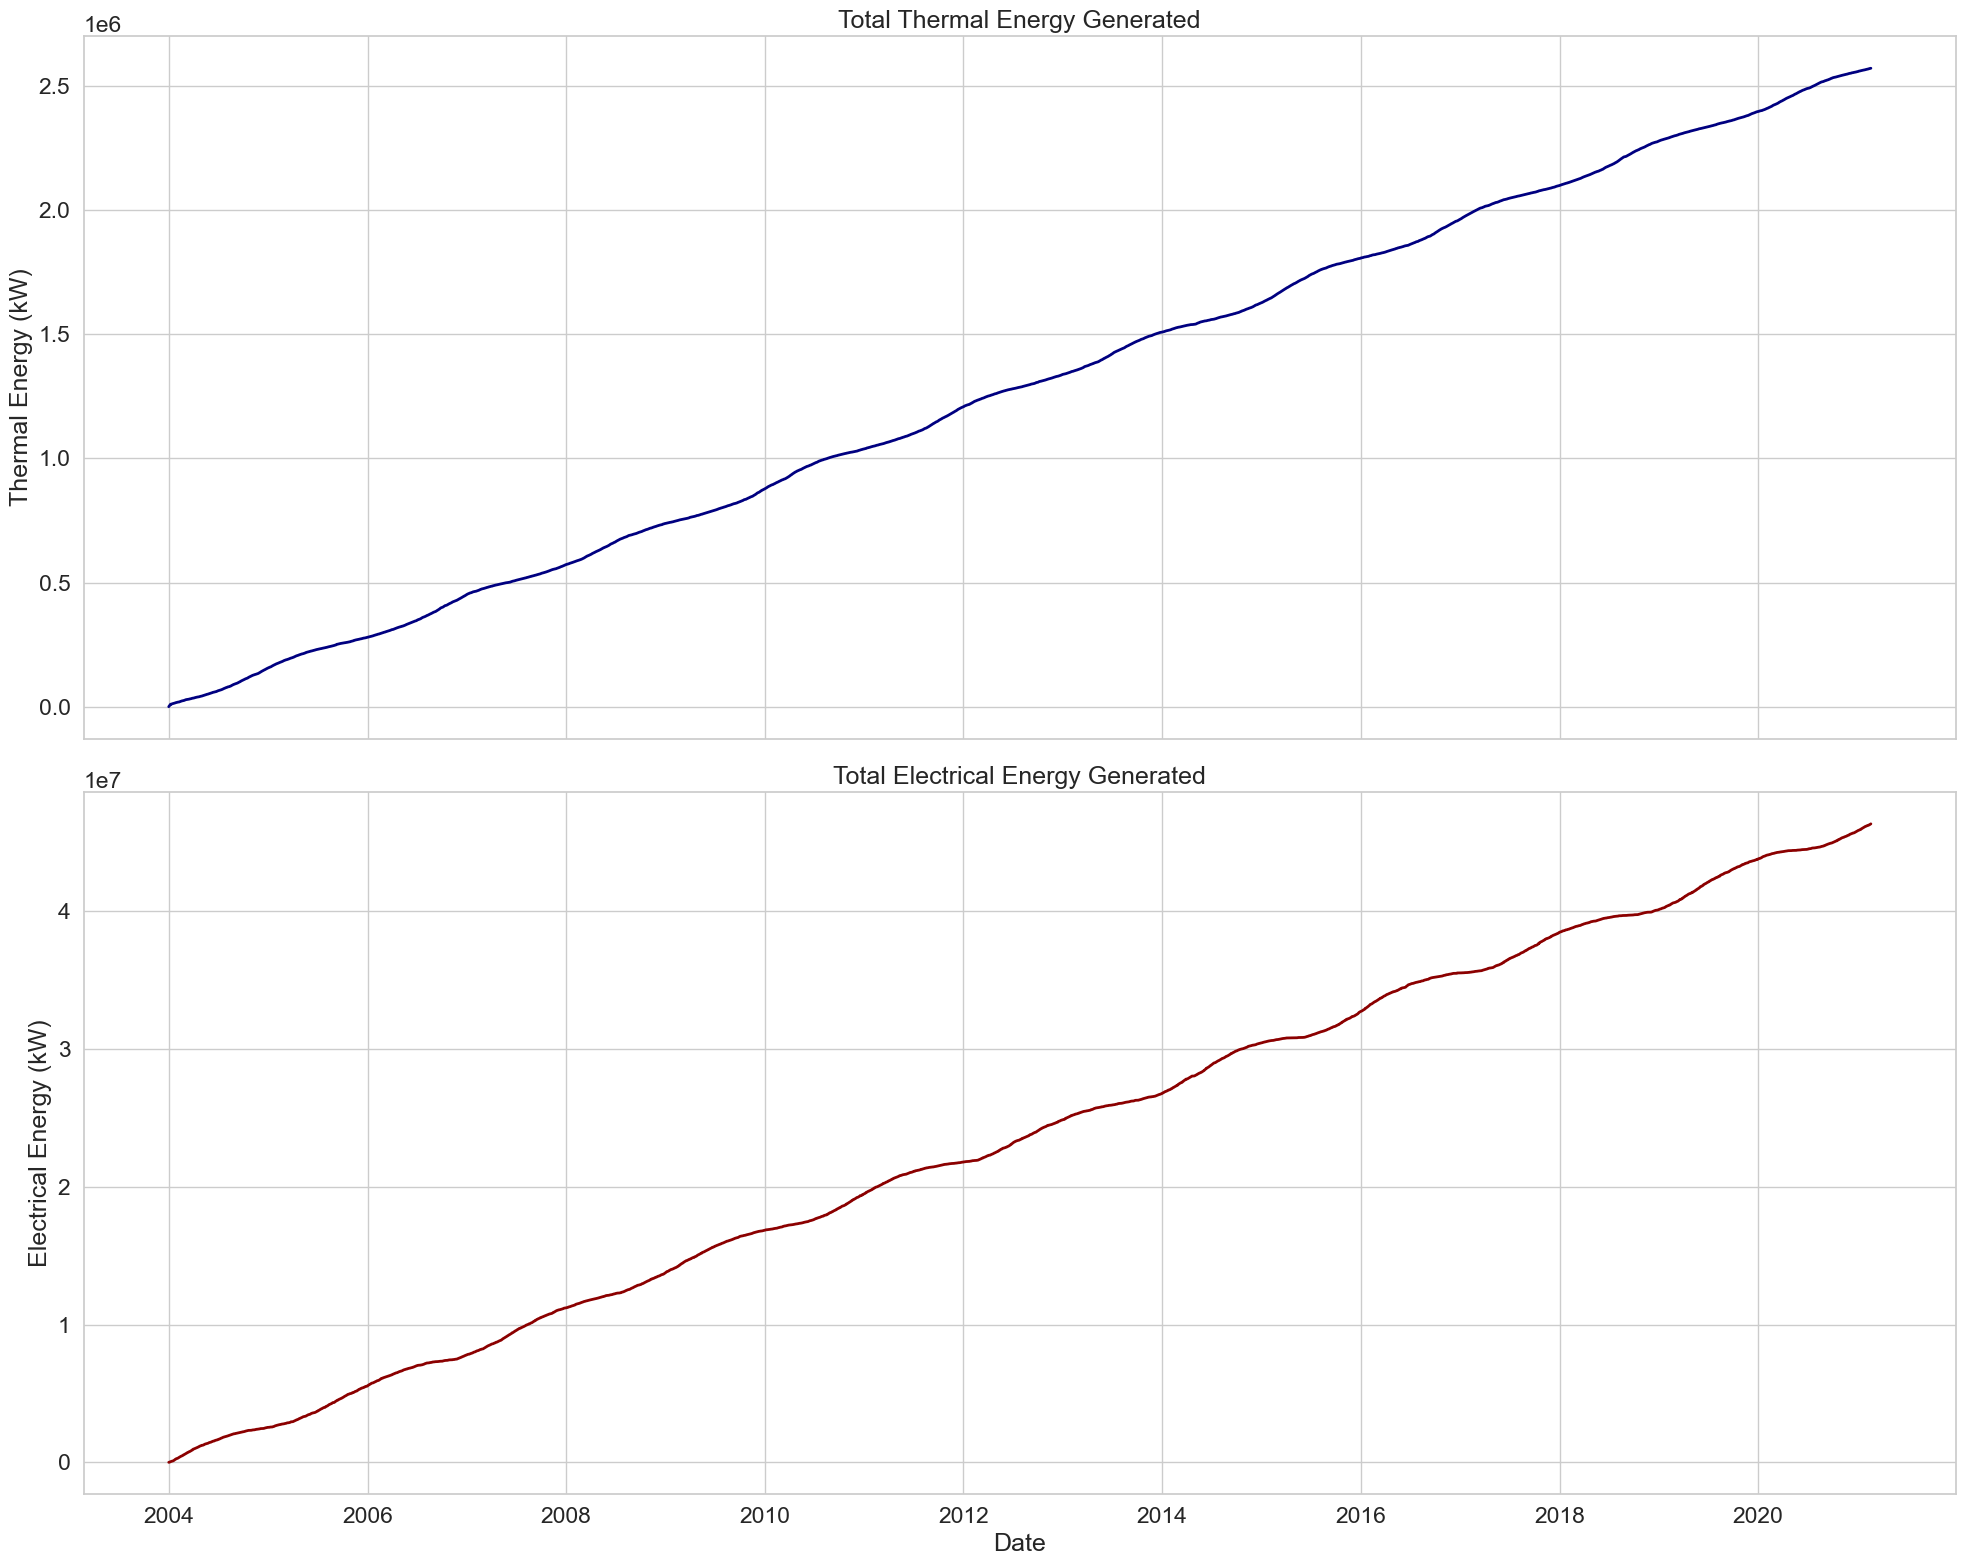

In [30]:
df_copy = df_new.copy()

df_copy.index = pd.date_range(start='2004-01-01', periods=len(df_new), freq='H')
sns.set(style="whitegrid", font_scale=1.5)

fig, ax = plt.subplots(2, figsize=(20, 16), sharex=True)

sns.lineplot(data=df_copy['G.E_th_tot'], ax=ax[0], color="navy", linewidth=2)
ax[0].set_title('Total Thermal Energy Generated')
ax[0].set_ylabel('Thermal Energy (kW)')

sns.lineplot(data=df_copy['G.E_el_tot'], ax=ax[1], color="darkred", linewidth=2)
ax[1].set_title('Total Electrical Energy Generated')
ax[1].set_ylabel('Electrical Energy (kW)')

plt.xlabel('Date')

plt.tight_layout() 
plt.savefig('../../imgs/openmodelica/OM_enegy_cumsum.pdf', format='pdf', transparent=True)

In [22]:
import re

#pattern = '^(?!.*TYM)(?!.*der)(?!.*SC)(?!.*\[).*$' #match columns without [, ..., in name
pattern = '^(?!.*TYM)(?!.*der)(?!.*\[).*$' #match columns without reference to derivative, tomato yield model (TYM) or [

matched_columns = [col for col in df_new.columns if re.match(pattern,col)]
print(len(matched_columns))
for col in matched_columns:
    print(col)

11
Unnamed: 0
time
G.air.T
G.air_Top.T
G.canopy.T
G.cover.T
G.E_el_tot
G.E_th_tot
G.sky.T
G.E_el_I
G.E_th_I


In [23]:
for column in matched_columns:
    col_type = df_new[column].dtype
    unique_values = df_new[column].nunique()
    
    if unique_values > 3:
        print(f"{column} : CONTINUOUS")
    else:
        print(f"{column} : DISCRETE")

Unnamed: 0 : CONTINUOUS
time : CONTINUOUS
G.air.T : CONTINUOUS
G.air_Top.T : CONTINUOUS
G.canopy.T : CONTINUOUS
G.cover.T : CONTINUOUS
G.E_el_tot : CONTINUOUS
G.E_th_tot : CONTINUOUS
G.sky.T : CONTINUOUS
G.E_el_I : CONTINUOUS
G.E_th_I : CONTINUOUS
pdrop_1ry.InFlow.p : CONTINUOUS
pdrop_1ry.OutFlow.h_outflow : CONTINUOUS
pdrop_1ry.OutFlow.m_flow : CONTINUOUS
pdrop_2ry.InFlow.m_flow : DISCRETE
pdrop_2ry.InFlow.p : DISCRETE
pdrop_2ry.OutFlow.h_outflow : CONTINUOUS
pdrop_2ry.OutFlow.m_flow : DISCRETE
pump_1ry.Mdot : CONTINUOUS
pump_1ry.flow_in : CONTINUOUS
pump_1ry.inlet.h_outflow : CONTINUOUS
pump_1ry.inlet.m_flow : CONTINUOUS
pump_1ry.outlet.h_outflow : CONTINUOUS
pump_1ry.outlet.m_flow : CONTINUOUS
pump_1ry.outlet.p : CONTINUOUS
pump_2ry.Mdot : DISCRETE
pump_2ry.flow_in : DISCRETE
pump_2ry.inlet.h_outflow : CONTINUOUS
pump_2ry.inlet.m_flow : DISCRETE
pump_2ry.outlet.m_flow : DISCRETE
pump_2ry.outlet.p : DISCRETE
set_Mdot_2ry.y : DISCRETE
set_Mdot_air.y : DISCRETE
sinkP_air.flangeB.m_flow

In [2]:
df_new = pd.read_csv('../data/testglobalsystem2_res_dropped.csv', usecols=matched_columns, index_col='time')
print(df_new)

              Unnamed: 0  CHP.firstOrder.y  CHP.fluid.h     E_amb_TES  \
time                                                                    
0.000000e+00           0               0.0  2092000.000  0.000000e+00   
5.947130e+01           1               0.0   129782.120  3.517455e-21   
6.000000e+01           3               0.0   129710.630  5.939979e-21   
2.400000e+02           5               0.0   157395.550 -4.640570e-18   
3.000000e+02           7               0.0   166805.780 -1.973970e-17   
...                  ...               ...          ...           ...   
1.787256e+08      205838               0.0    55827.020 -4.128620e-13   
1.787292e+08      205841               0.0    55814.066 -4.128620e-13   
1.787328e+08      205844               0.0    55802.344 -4.128620e-13   
1.787345e+08      205847               0.0    55797.080 -4.128620e-13   
1.787364e+08      205849               0.0    55791.740 -4.128620e-13   

              E_el_CHP  E_el_HP    E_el_buy  E_el_

Since energy, both electrical and thermal, are calculated as cumulative totals, we can differentiate in order to get instantaneous energy consumption values

In [54]:
df_copy = df_new.copy()
df_copy['G.E_el_I'] = df_new['G.E_el_tot'].diff()
df_copy['G.E_th_I'] = df_new['G.E_th_tot'].diff()

df_copy['G.E_el_I'].fillna(df_new['G.E_el_tot'].iloc[0], inplace=True)
df_copy['G.E_th_I'].fillna(df_new['G.E_th_tot'].iloc[0], inplace=True)



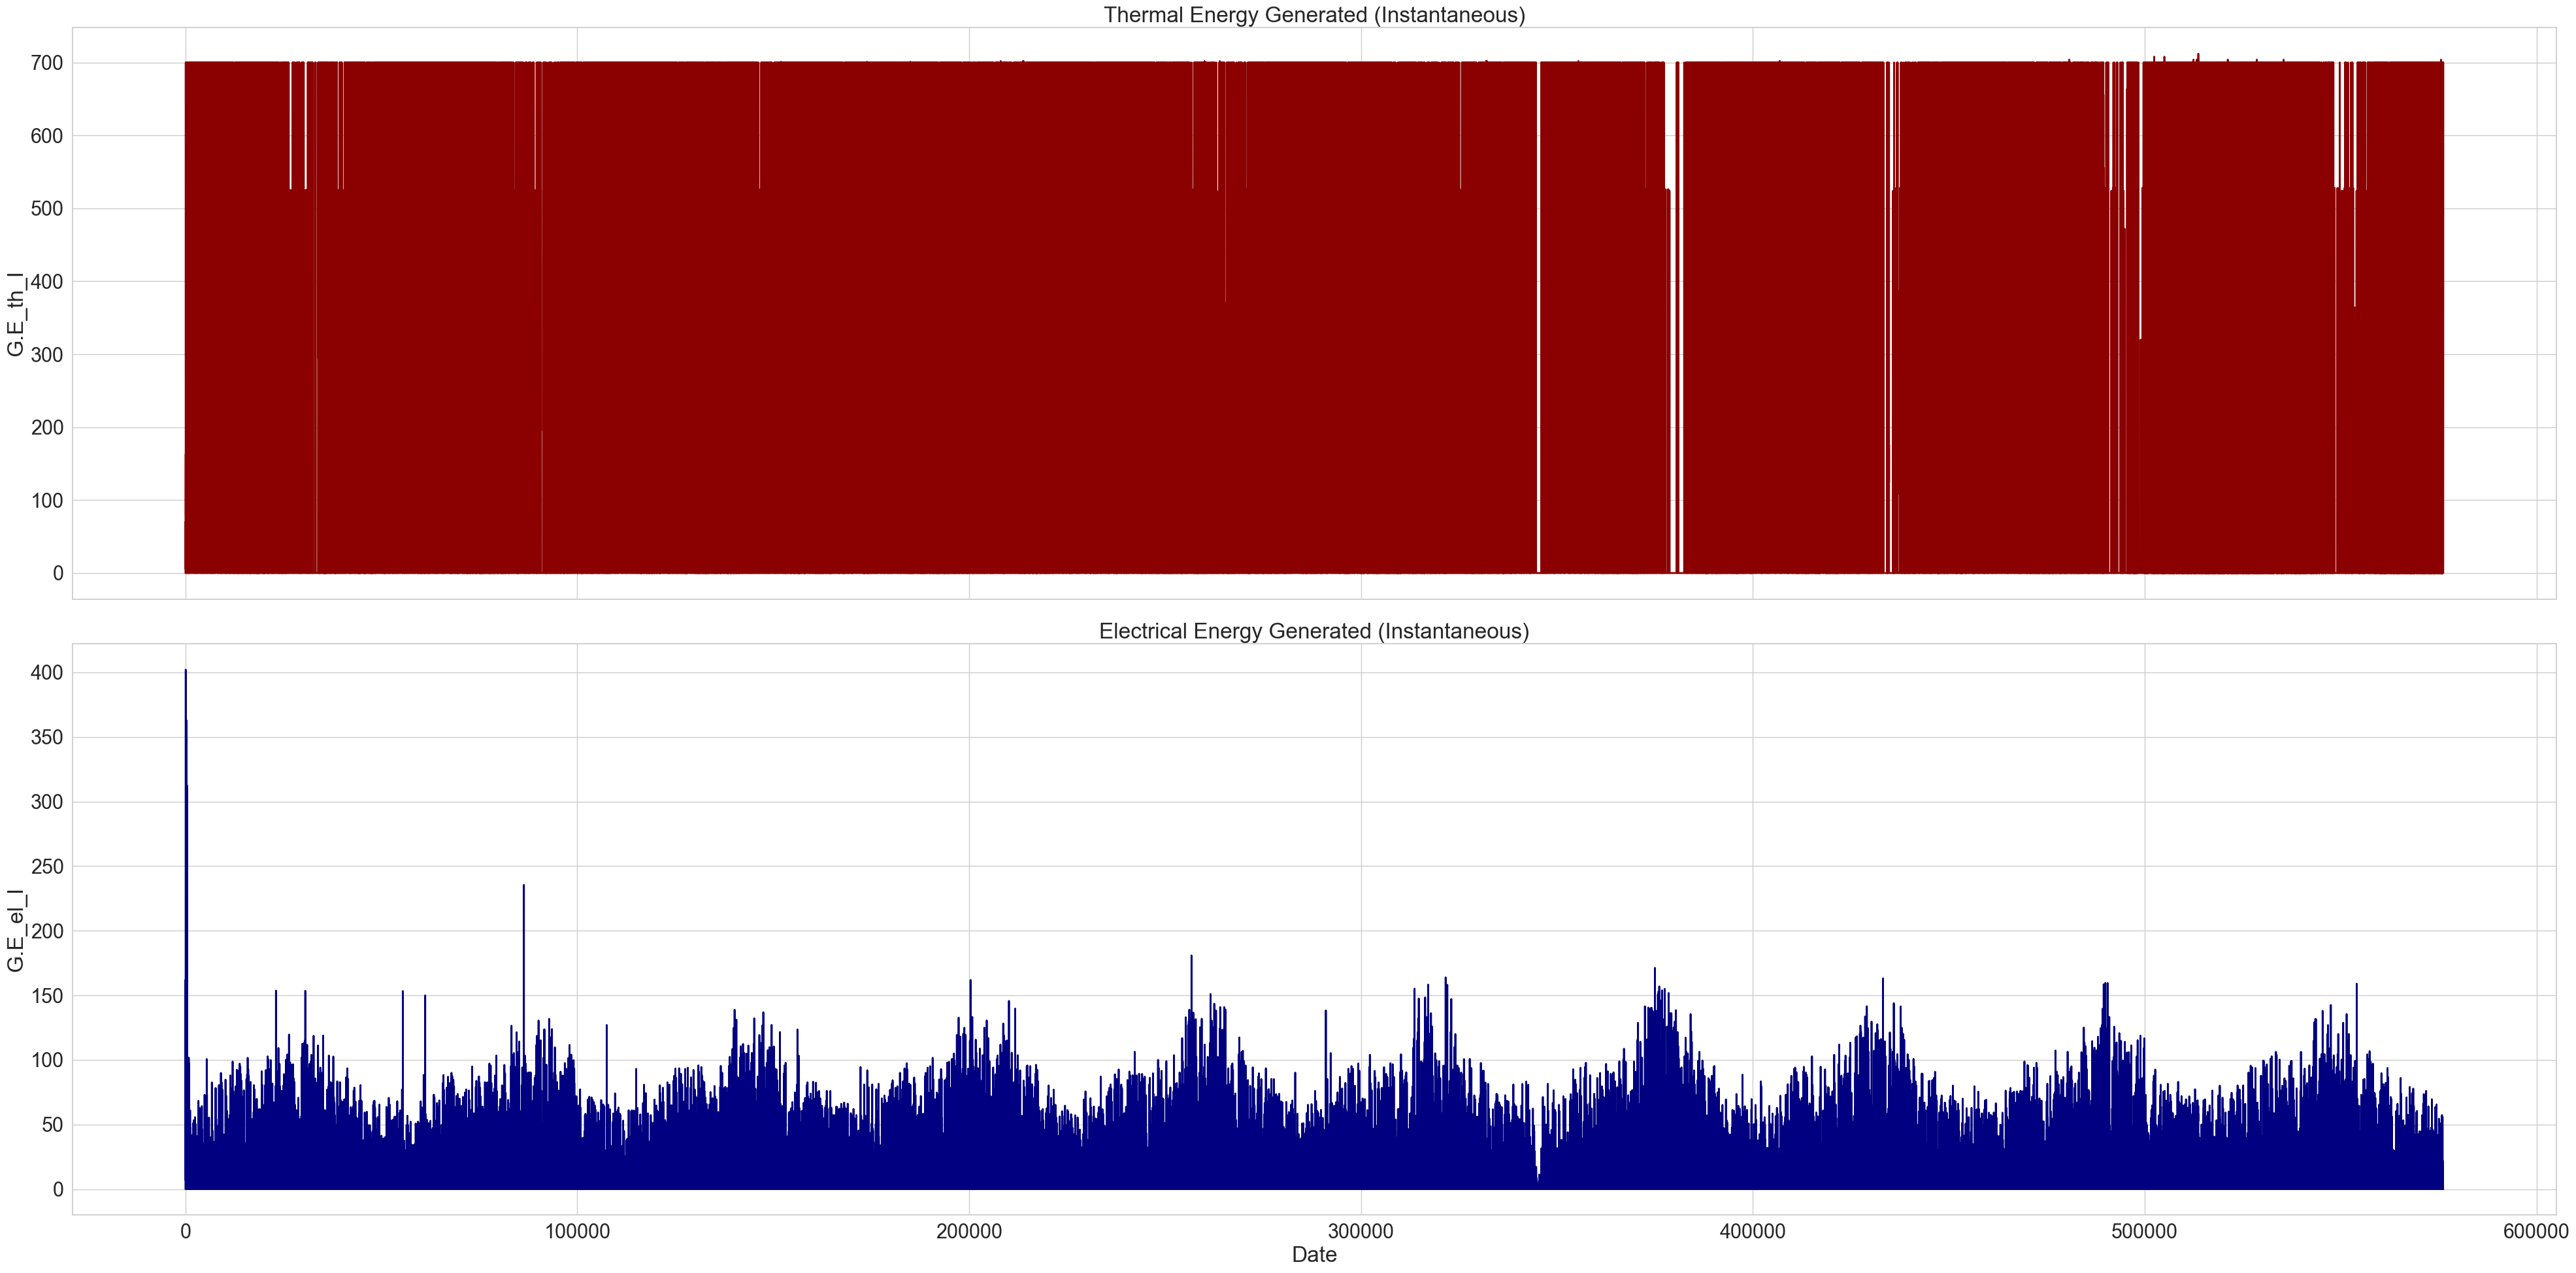

In [56]:
dates = pd.date_range(start='2004-01-01', periods=len(df_new), freq='H') 
df_new.index = dates

sns.set(style="whitegrid", font_scale=2)

fig, ax = plt.subplots(2, 1, figsize=(40, 20), sharex=True)

sns.lineplot(data=df_copy['G.E_th_I'], ax=ax[1], color="navy", linewidth=2)
ax[0].set_title('Thermal Energy Generated (Instantaneous)')
ax[0].set_ylabel('G.E_th_I')

sns.lineplot(data=df_copy['G.E_el_I'], ax=ax[0], color="darkred", linewidth=2)
ax[1].set_title('Electrical Energy Generated (Instantaneous)')
ax[1].set_ylabel('G.E_el_I')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

700.0 130.50340577640827


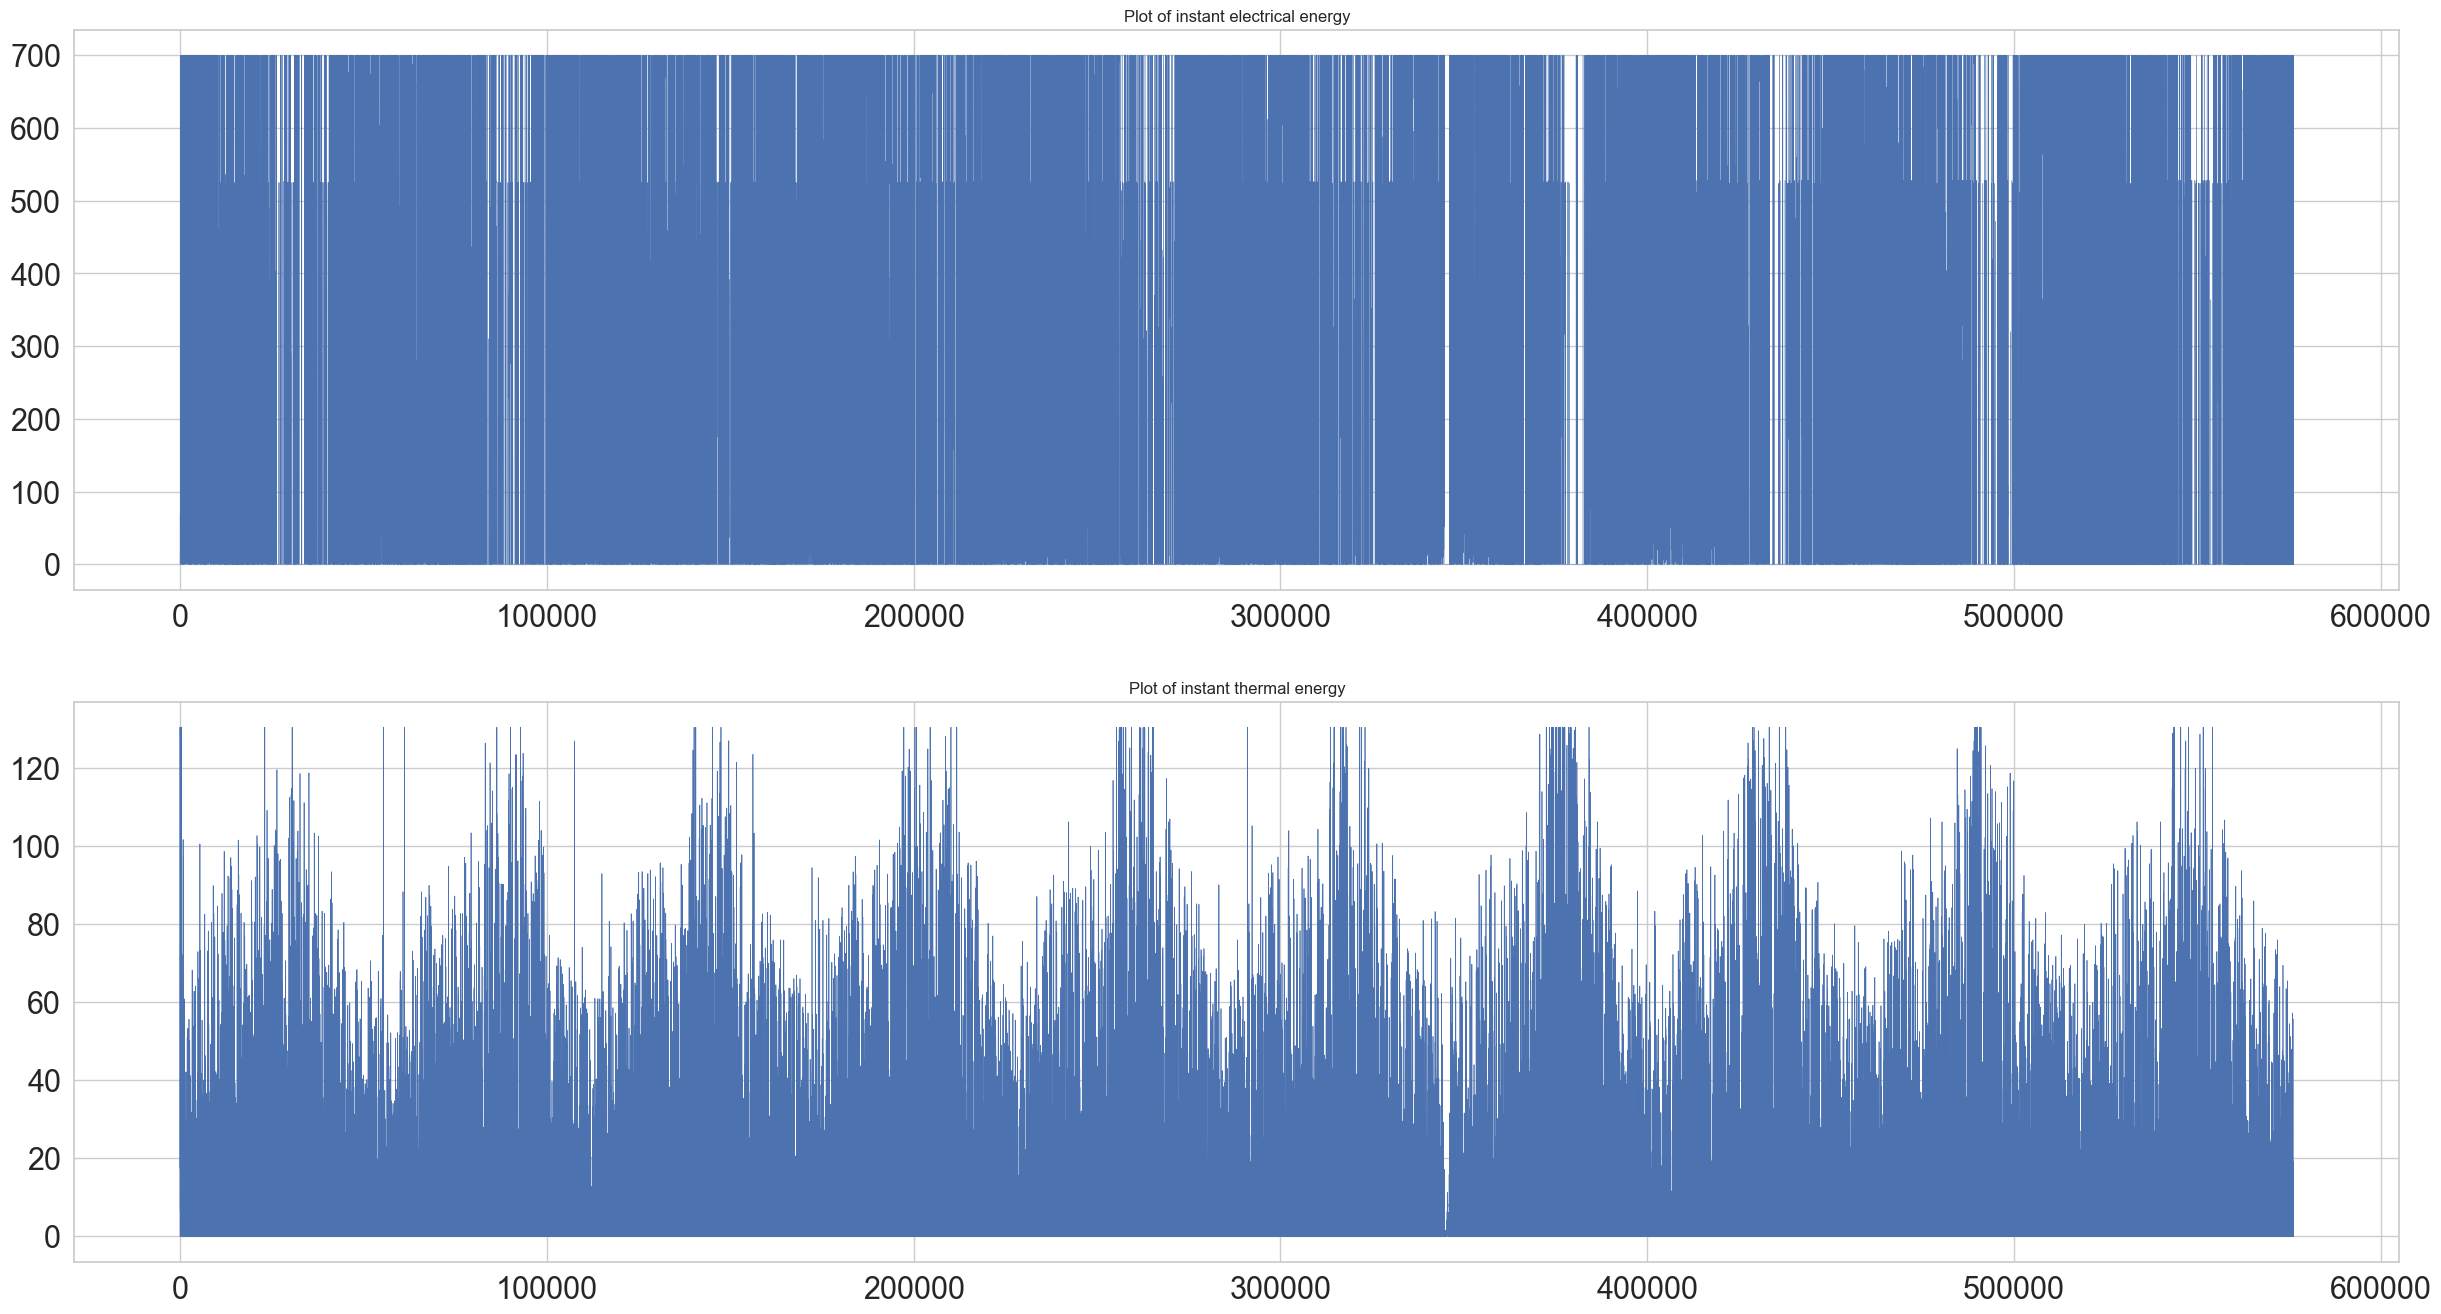

In [81]:
el_thrsh, th_thrsh = df_copy['G.E_el_I'].quantile(0.99), df_copy['G.E_th_I'].quantile(0.9995)

df_copy['G.E_el_I'] = df_copy['G.E_el_I'].apply(lambda x: min(x, el_thrsh))
df_copy['G.E_th_I'] = df_copy['G.E_th_I'].apply(lambda x: min(x, th_thrsh))
print(el_thrsh, th_thrsh)

fig, ax = plt.subplots(2, figsize=(30,16))
ax[0].plot(df_copy['G.E_el_I'], linewidth=0.25)
ax[1].plot(df_copy['G.E_th_I'], linewidth=0.5)

ax[0].set_title('Plot of instant electrical energy', fontsize=12)
ax[1].set_title('Plot of instant thermal energy', fontsize=12)

#ax[0].set_xlim([0, 0.5e8])
#ax[1].set_xlim([0, 0.5e8])

plt.show()#plt.savefig('../../imgs/openmodelica/OM_energy_instant.pdf', format='pdf', transparent=True)

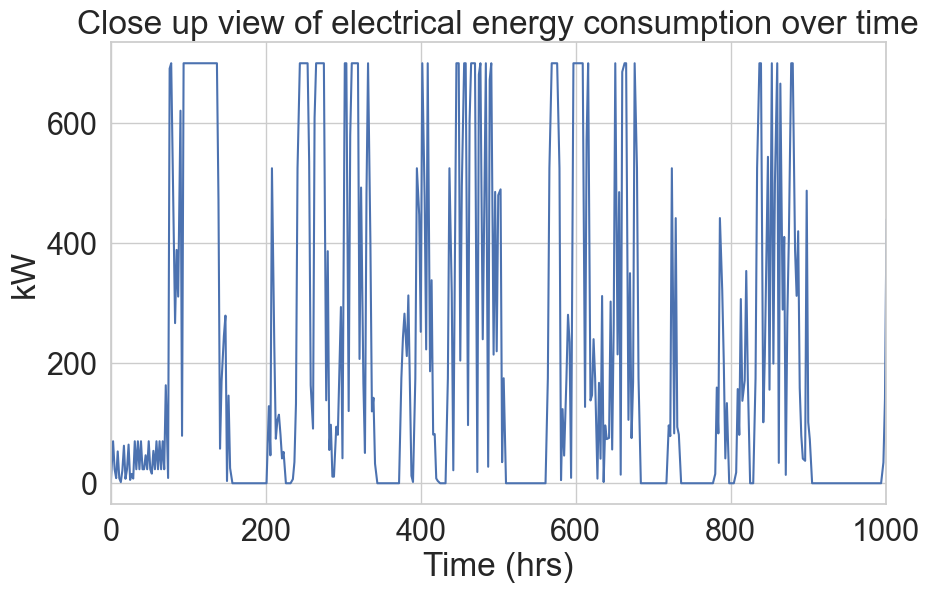

In [77]:
plt.figure(figsize=(10,6))
plt.plot(df_copy['G.E_el_I'])
plt.xlim([0, 1e3])
plt.ylabel('kW')
plt.xlabel('Time (hrs)')
plt.title('Close up view of electrical energy consumption over time')
plt.savefig('../../imgs/openmodelica/OM_energy_closeup.pdf', format='pdf', transparent=True)

In [8]:
df_new.to_csv('../data/testglobalsystem2_res_reduced.csv')

In [3]:
df_new = pd.read_csv('../data/testglobalsystem2_res_reduced.csv', index_col='time')

KeyboardInterrupt: 

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns, index=df_copy.index)

In [83]:
print(df_std)

        Unnamed: 0          time   G.air.T  G.air_Top.T  G.canopy.T  \
0         0.000000  0.000000e+00  0.471951     0.472372    0.413257   
1         0.000002  1.902588e-07  0.404407     0.407131    0.426046   
3         0.000005  7.610350e-07  0.312378     0.314337    0.323123   
5         0.000009  9.512938e-07  0.287796     0.289637    0.294276   
7         0.000012  1.020756e-06  0.279897     0.281637    0.284882   
...            ...           ...       ...          ...         ...   
576198    0.999983  9.999772e-01  0.295190     0.295272    0.240715   
576201    0.999988  9.999829e-01  0.295032     0.295149    0.240483   
576203    0.999991  9.999886e-01  0.295437     0.295599    0.240802   
576206    0.999997  9.999943e-01  0.294758     0.294924    0.240347   
576208    1.000000  1.000000e+00  0.293800     0.293966    0.239570   

        G.cover.T    G.E_el_tot  G.E_th_tot   G.sky.T  G.E_el_I  G.E_th_I  
0        0.605054  0.000000e+00    0.000000  0.305147  0.000000  0.0000

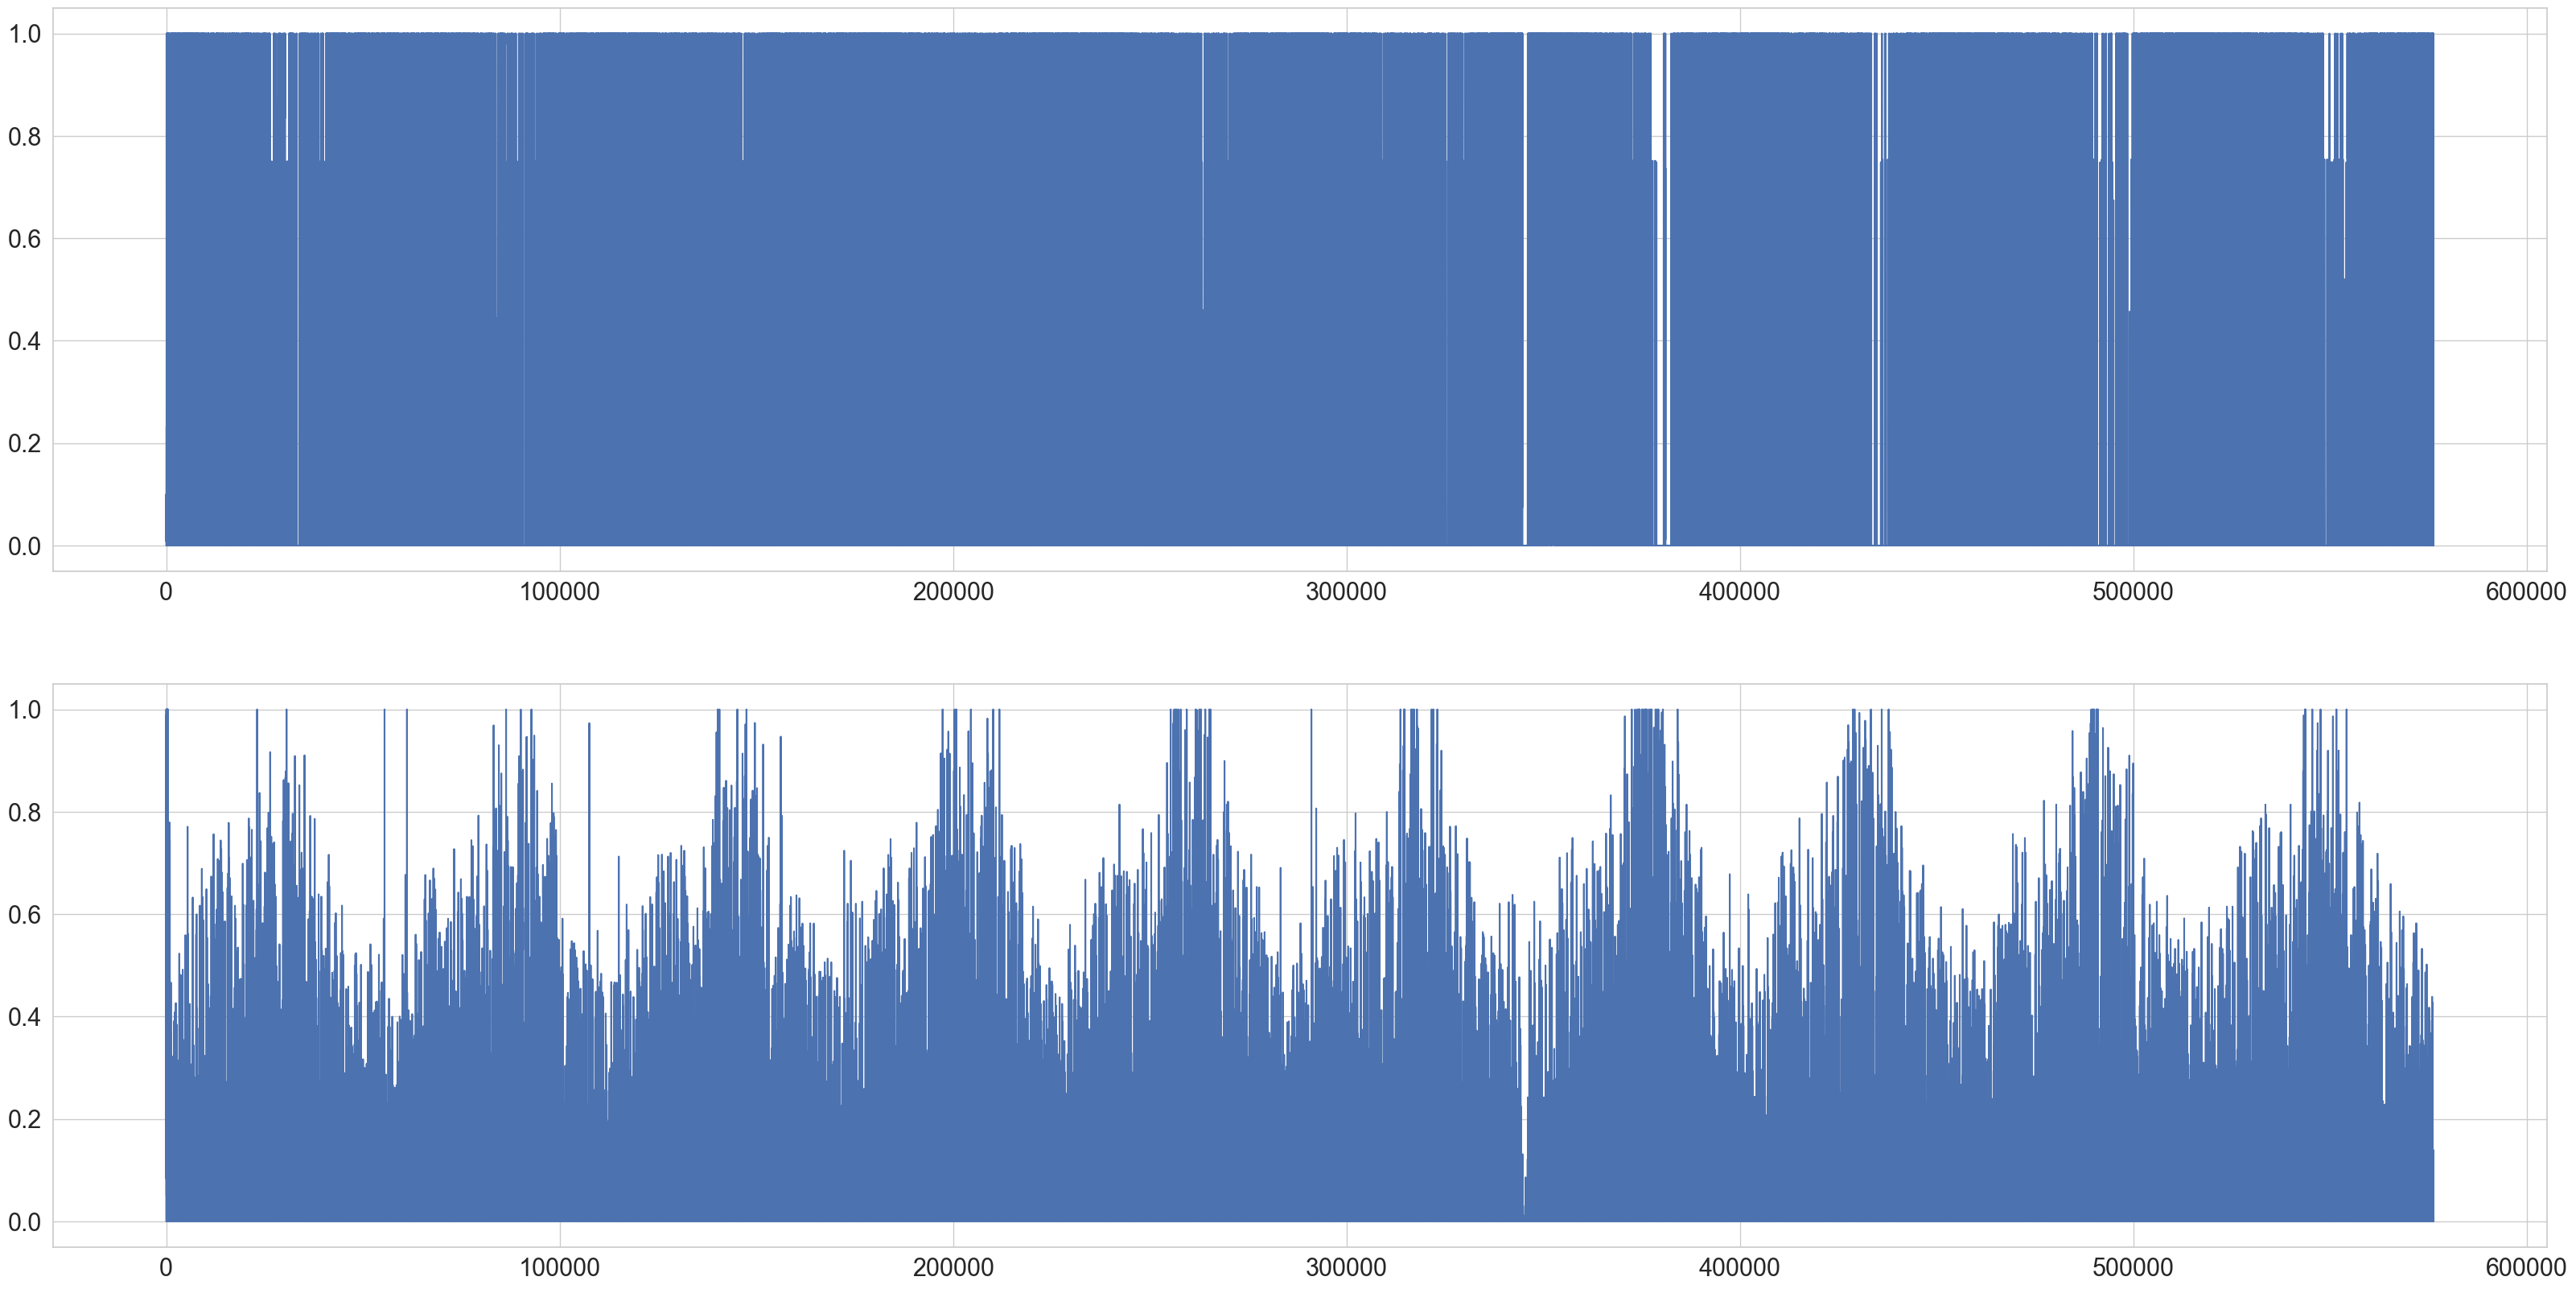

In [84]:
fig, ax = plt.subplots(2, figsize=(40,20))
ax[0].plot(df_std['G.E_el_I'])
ax[1].plot(df_std['G.E_th_I'])

#ax[0].set_xlim(0, 1_000)
#ax[1].set_xlim(0, 1_000)

plt.show()

In [11]:
df_std.to_csv('../data/testglobalsystem2_res_std.csv')

In [3]:
df_std = pd.read_csv('../data/testglobalsystem2_res_std.csv', index_col='time')

In [12]:
for col in df_std.columns:
    if 'CO2' in col:
        print(col)

G.air.T
G.air_Top.T
G.canopy.T
G.cover.T
G.floor.T
CHP.T_water_ex_CHP
CHP.fluid.T
CHP.heatPortConverter.thermalPortL.T
G.MV_CanAir.T_m
G.Q_cd_Soil.TC_cc.dT
G.Q_cd_Soil.TC_ss.Q_flow
G.Q_cd_Soil.TC_ss.dT
G.Q_ven_AirOut.NaturalVentilationRate.T_mean
G.Q_ven_TopOut.NaturalVentilationRate.T_b
G.Q_ven_TopOut.NaturalVentilationRate.T_mean
G.T_ex_1ry.T
G.T_ex_2ry.T
G.T_su_1ry.T
G.Tout_Kelvin.y
G.U_vents.T_air_sp
G.U_vents.Tair_setpoint1.y
G.sky.port.T
HP.T_ex_cd
HP.T_su_ev
HP.fluid.T
HP.heatPortConverter.thermalPortL.T
TES.Wall_ext.T
T_ex_CHP.T
T_ex_G.T
T_ex_TES.T
T_su_CHP.T
T_su_G.T
T_su_HP.T
G.SC.T2c.localCondition
G.SC.T3c.localCondition
G.SC.T4.localCondition
G.SC.T5.localCondition
G.SC.T8b.localCondition
G.SC.T9.localCondition
controller.T1.localCondition
controller.T2.localCondition
CHP.T_ex_CHP.T
CHP.T_ex_CHP.port.p
CHP.Tc
CHP.fluid.Wall_int.T
CHP.fluid.fluidState.T
CHP.heatPortConverter.heatPort.T
CHP.prescribedHeatFlow.port.T
G.MV_CanAir.T_can
G.Q_cd_Soil.TC_cc.Q_flow
G.Q_cd_Soil.TC_c

In [11]:
print(df_std['G.E_el_I'].corr(df_std['G.CO2_air.CO2']))
print(df_std['G.E_th_I'].corr(df_std['G.CO2_air.CO2']))

0.05697796564991577

In [12]:
for col in df_std.columns:
    if '.T' in col:
        print(col)

G.air.T
G.air_Top.T
G.canopy.T
G.cover.T
G.floor.T
CHP.T_water_ex_CHP
CHP.fluid.T
CHP.heatPortConverter.thermalPortL.T
G.MV_CanAir.T_m
G.Q_cd_Soil.TC_cc.dT
G.Q_cd_Soil.TC_ss.Q_flow
G.Q_cd_Soil.TC_ss.dT
G.Q_ven_AirOut.NaturalVentilationRate.T_mean
G.Q_ven_TopOut.NaturalVentilationRate.T_b
G.Q_ven_TopOut.NaturalVentilationRate.T_mean
G.T_ex_1ry.T
G.T_ex_2ry.T
G.T_su_1ry.T
G.Tout_Kelvin.y
G.U_vents.T_air_sp
G.U_vents.Tair_setpoint1.y
G.sky.port.T
HP.T_ex_cd
HP.T_su_ev
HP.fluid.T
HP.heatPortConverter.thermalPortL.T
TES.Wall_ext.T
T_ex_CHP.T
T_ex_G.T
T_ex_TES.T
T_su_CHP.T
T_su_G.T
T_su_HP.T
G.SC.T2c.localCondition
G.SC.T3c.localCondition
G.SC.T4.localCondition
G.SC.T5.localCondition
G.SC.T8b.localCondition
G.SC.T9.localCondition
controller.T1.localCondition
controller.T2.localCondition
CHP.T_ex_CHP.T
CHP.T_ex_CHP.port.p
CHP.Tc
CHP.fluid.Wall_int.T
CHP.fluid.fluidState.T
CHP.heatPortConverter.heatPort.T
CHP.prescribedHeatFlow.port.T
G.MV_CanAir.T_can
G.Q_cd_Soil.TC_cc.Q_flow
G.Q_cd_Soil.TC_c

In [14]:
print(df_std['G.E_el_I'].corr(df_std['CHP.Tc']))
print(df_std['G.E_th_I'].corr(df_std['CHP.Tc']))

-0.11590987853859046
-0.0942844205775002


In [ ]:
import pandas as pd
df_new_reduced = pd.read_csv('../data/standardised_output.csv').set_index('time')

In [89]:
print(df_std)

        Unnamed: 0          time   G.air.T  G.air_Top.T  G.canopy.T  \
0         0.000000  0.000000e+00  0.471951     0.472372    0.413257   
1         0.000002  1.902588e-07  0.404407     0.407131    0.426046   
3         0.000005  7.610350e-07  0.312378     0.314337    0.323123   
5         0.000009  9.512938e-07  0.287796     0.289637    0.294276   
7         0.000012  1.020756e-06  0.279897     0.281637    0.284882   
...            ...           ...       ...          ...         ...   
576198    0.999983  9.999772e-01  0.295190     0.295272    0.240715   
576201    0.999988  9.999829e-01  0.295032     0.295149    0.240483   
576203    0.999991  9.999886e-01  0.295437     0.295599    0.240802   
576206    0.999997  9.999943e-01  0.294758     0.294924    0.240347   
576208    1.000000  1.000000e+00  0.293800     0.293966    0.239570   

        G.cover.T    G.E_el_tot  G.E_th_tot   G.sky.T  G.E_el_I  G.E_th_I  
0        0.605054  0.000000e+00    0.000000  0.305147  0.000000  0.0000

C:\Users\matth\AppData\Local\Temp\ipykernel_8992\3828618111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['G.E_tot_I'] = (data['G.E_el_I'] + data['G.E_th_I'])


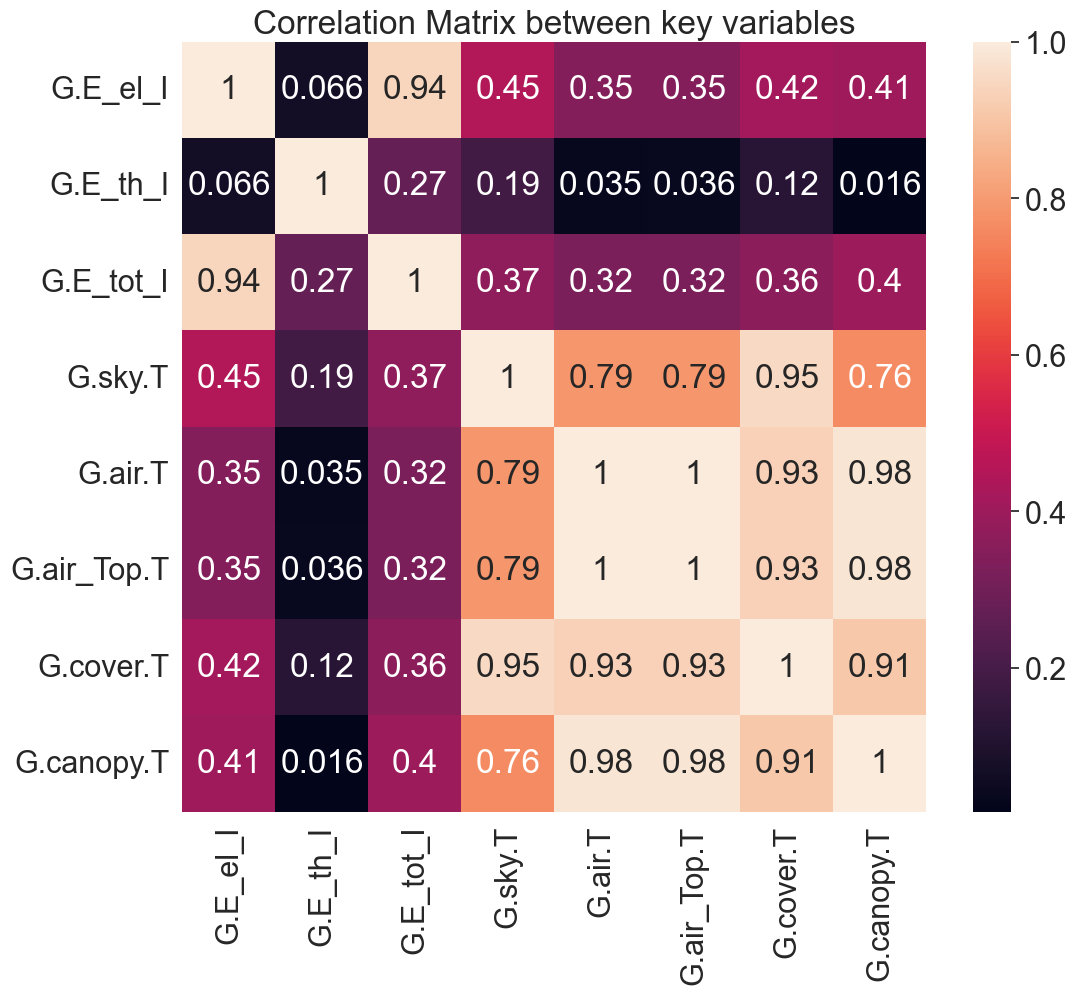

In [86]:
import seaborn as sns
columns = ['G.E_el_I', 'G.E_th_I', 'G.E_tot_I', 'G.sky.T', 'G.air.T', 'G.air_Top.T', 'G.cover.T', 'G.canopy.T']
data = df_std[['G.E_el_I', 'G.E_th_I', 'G.sky.T', 'G.air.T', 'G.air_Top.T', 'G.cover.T', 'G.canopy.T']]
data['G.E_tot_I'] = (data['G.E_el_I'] + data['G.E_th_I'])

data = data[columns]
plt.figure(figsize=(12,10))
correlation_matrix = abs(data.corr())
sns.heatmap(correlation_matrix, annot=True)
#plt.show()
plt.title('Correlation Matrix between key variables')
plt.show()#plt.savefig('../imgs/corr.png')

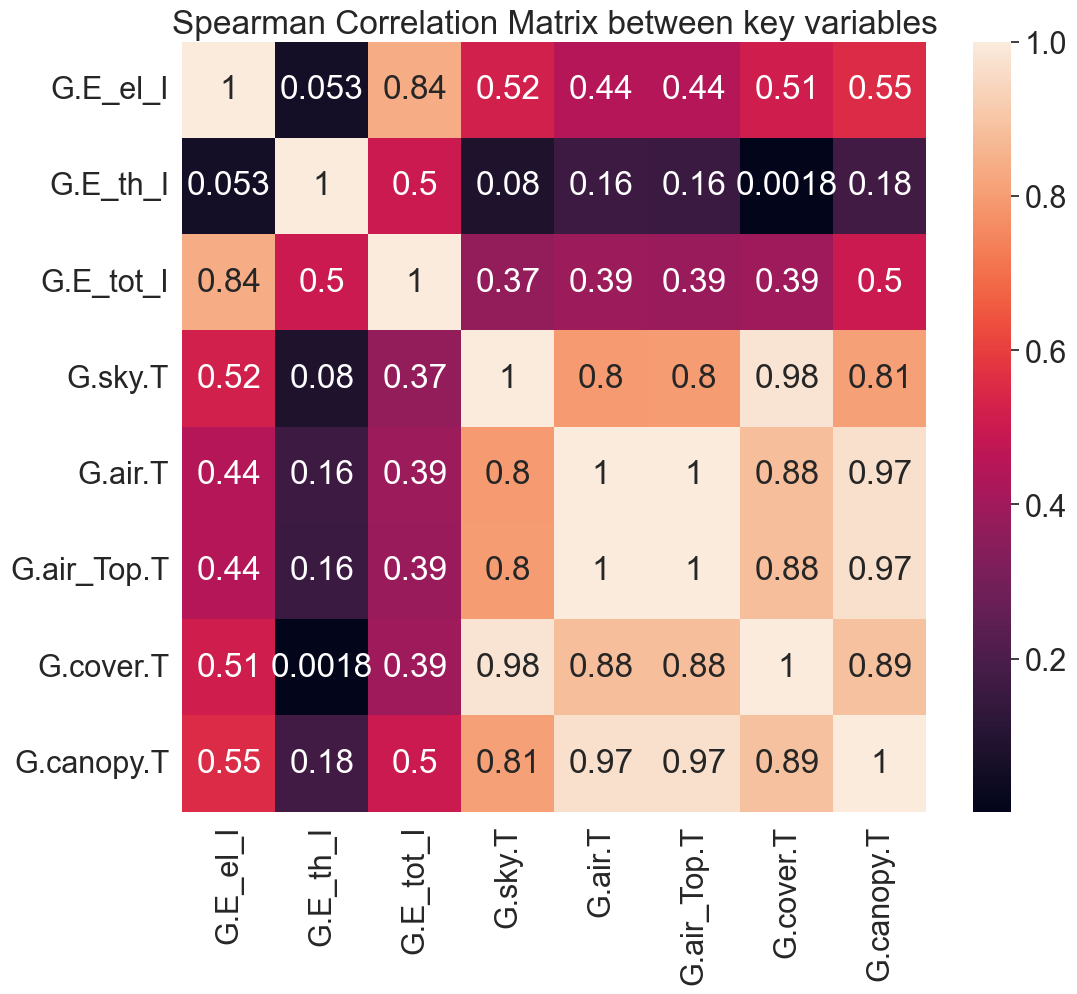

In [88]:
spearman_corr_matrix = abs(data.corr(method='spearman'))

plt.figure(figsize=(12,10))
sns.heatmap(spearman_corr_matrix, annot=True)
plt.title('Spearman Correlation Matrix between key variables')
plt.show()#plt.savefig('../imgs/corrSpearman.png')

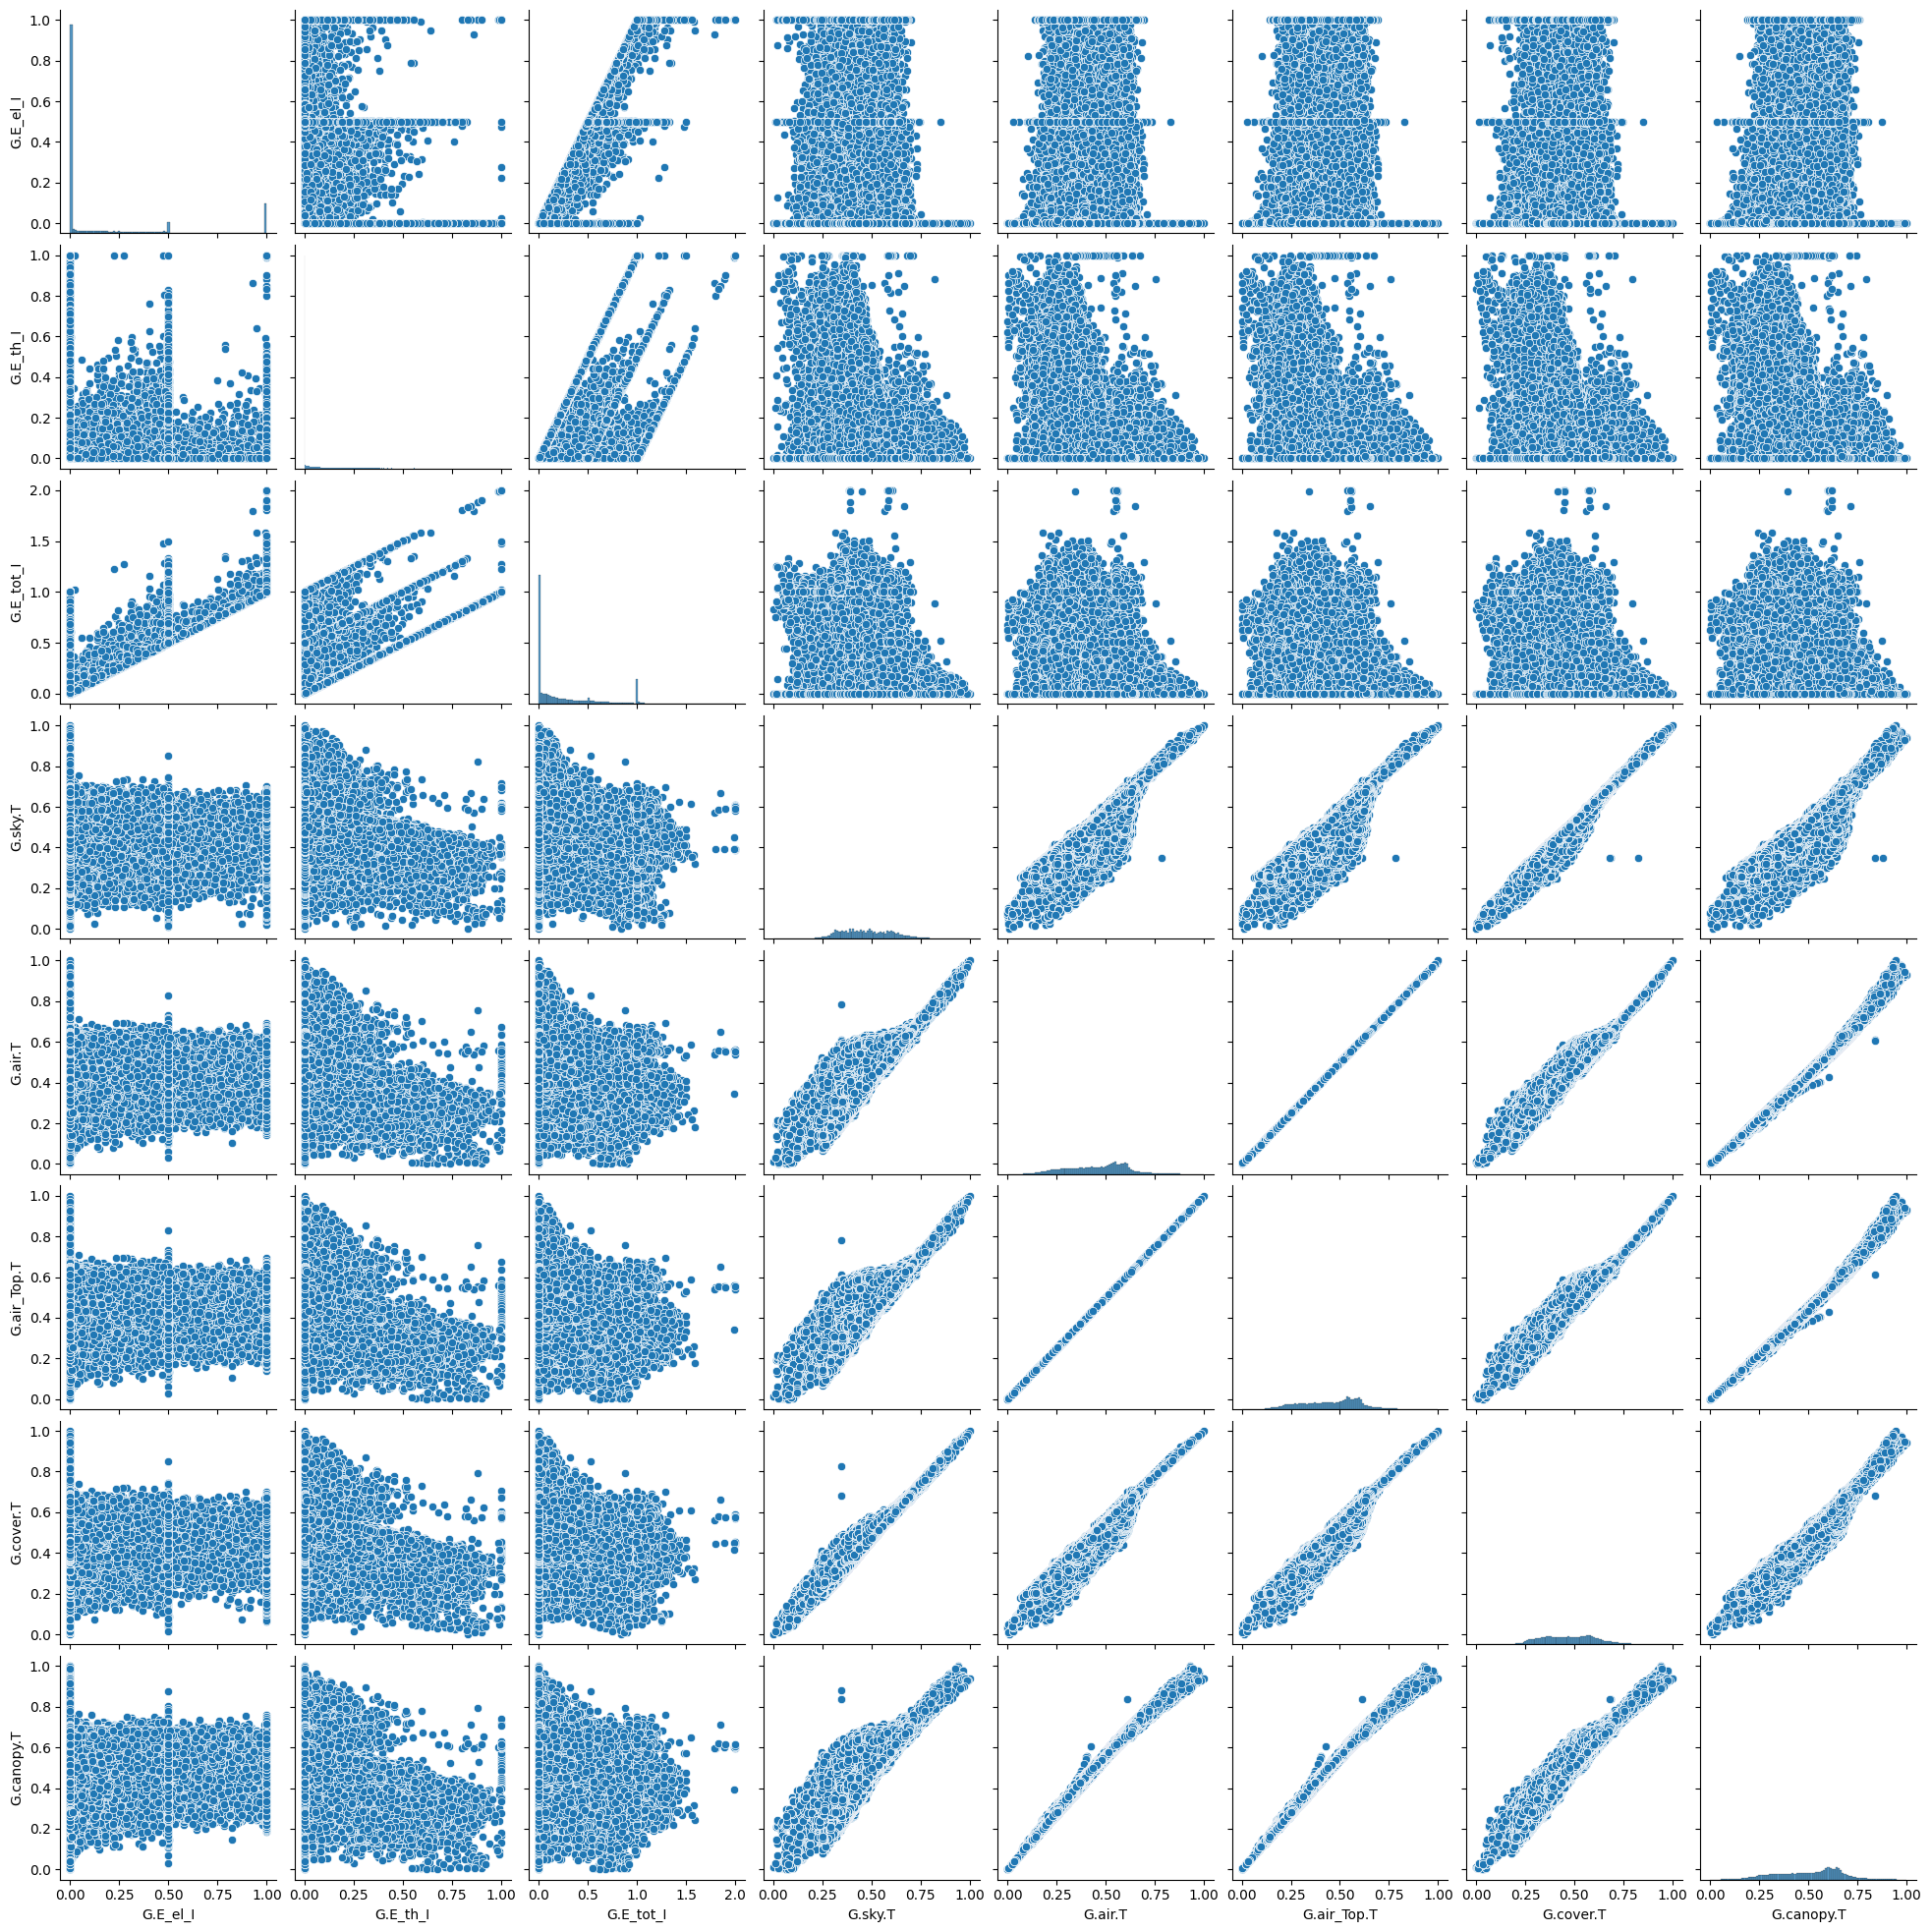

In [59]:
sns.pairplot(data)
plt.show()

In [97]:
data_lag_el, data_lag_th, data_lag_tot = data.copy(), data.copy(), data.copy()

for i in range(28):
    data_lag_el[f'G.E_el_I_lag{i+1}']   = data['G.E_el_I'].shift((i+1)*6)
    data_lag_th[f'G.E_th_I_lag{i+1}']   = data['G.E_th_I'].shift((i+1)*6)
    data_lag_tot[f'G.E_tot_I_lag{i+1}'] = data['G.E_tot_I'].shift((i+1)*6)

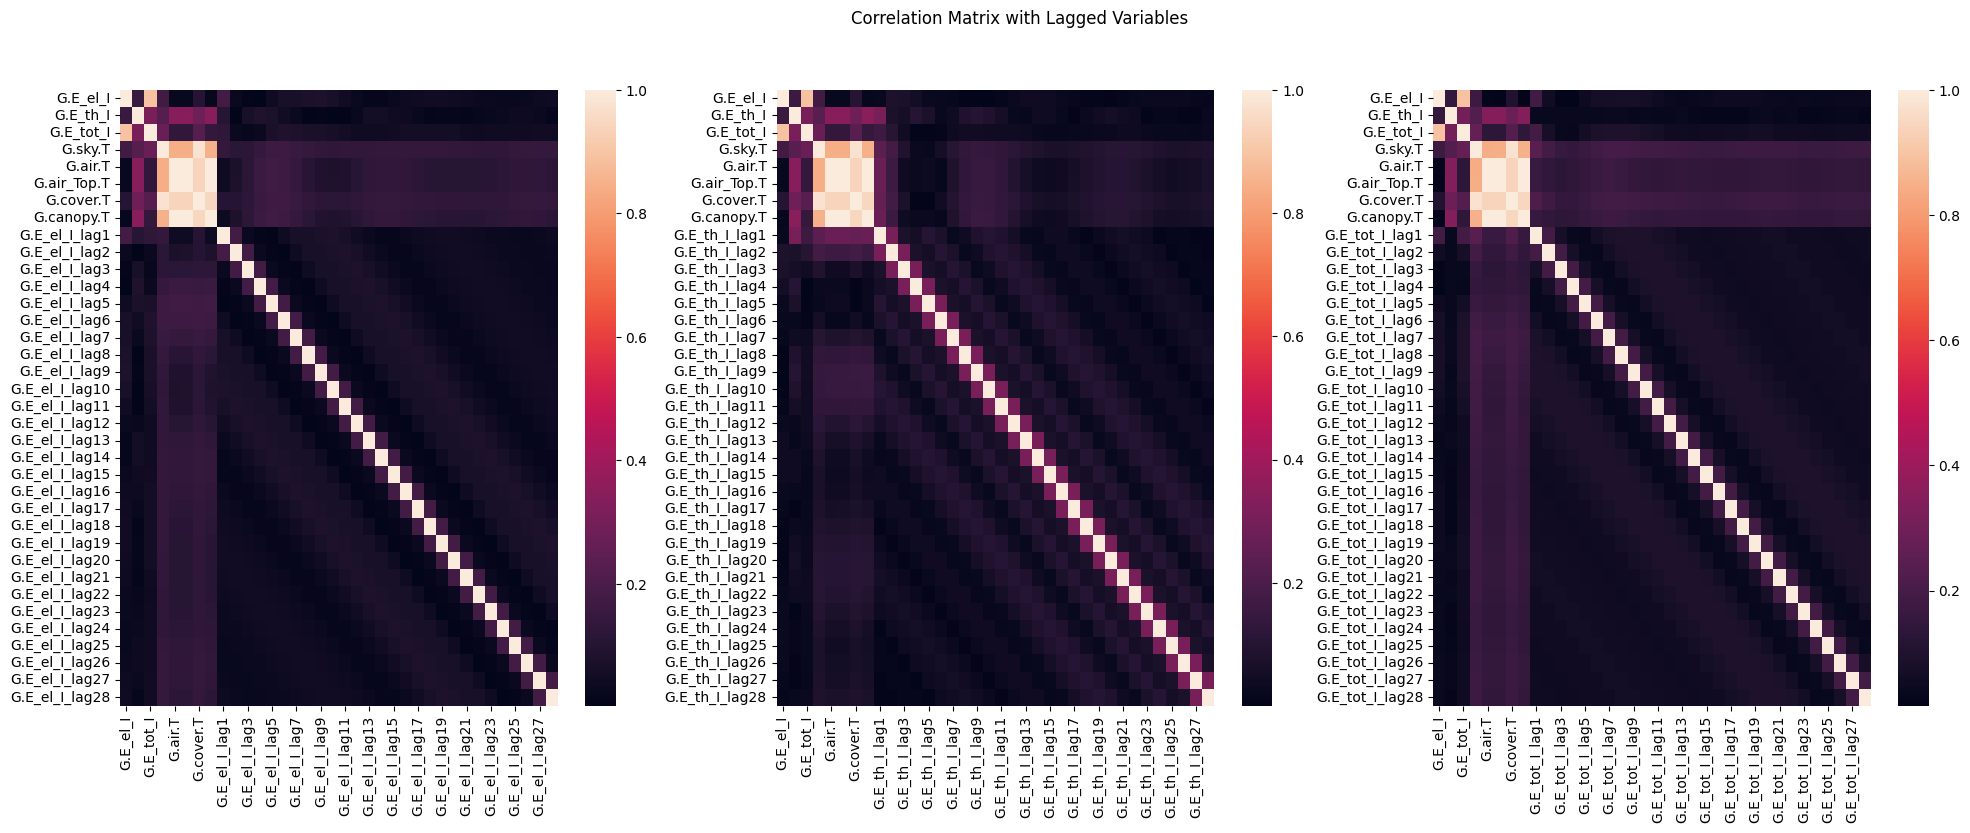

In [99]:
correlation_matrix_lag_el  = abs(data_lag_el.corr())
correlation_matrix_lag_th  = abs(data_lag_th.corr())
correlation_matrix_lag_tot = abs(data_lag_tot.corr())

fig, axes = plt.subplots(1,3, figsize=(24,8))
fig.suptitle('Correlation Matrix with Lagged Variables')

sns.heatmap(correlation_matrix_lag_el,  annot=False, ax=axes[0])
sns.heatmap(correlation_matrix_lag_th,  annot=False, ax=axes[1])
sns.heatmap(correlation_matrix_lag_tot, annot=False, ax=axes[2])
plt.show()

In [65]:
print(data_lag.head())

            G.E_el_I  G.E_th_I  G.E_tot_I   G.sky.T   G.air.T  G.air_Top.T  \
time                                                                         
0.000000         0.0  0.000000   0.000000  0.347328  0.783113     0.782846   
59.471302        0.0  0.227398   0.227398  0.347360  0.608514     0.612307   
60.000000        0.0  0.002104   0.002104  0.347360  0.607512     0.611291   
240.000000       0.0  0.736952   0.736952  0.347455  0.425905     0.427217   
300.000000       0.0  0.247315   0.247315  0.347487  0.404025     0.404718   

            G.cover.T  G.canopy.T  G.E_el_I_lag1  G.E_th_I_lag1  ...  \
time                                                             ...   
0.000000     0.827896    0.879535            NaN            NaN  ...   
59.471302    0.683424    0.837068            0.0       0.000000  ...   
60.000000    0.682387    0.836348            0.0       0.227398  ...   
240.000000   0.468850    0.605287            0.0       0.002104  ...   
300.000000   0.434747

Ways of handling the two response variable:
 - Two separate models
 - One combined response var.
 - Multi-output regression model

In [9]:
data = df_std[['G.air.T', 'G.sky.T', 'G.air_Top.T', 'G.canopy.T', 'G.cover.T']]
pca = PCA(n_components='mle')
reduced_data = pca.fit_transform(data)
print(reduced_data)

[[ 5.79646850e-01  3.10883212e-01  3.88543084e-02  2.52225803e-01]
 [ 3.38929043e-01  2.33970403e-01  1.46988953e-01  1.70553316e-01]
 [ 3.37209831e-01  2.33442311e-01  1.47238773e-01  1.69976260e-01]
 ...
 [ 3.68198232e-01 -5.67090882e-02 -1.30293548e-02  2.04285486e-03]
 [ 3.78453624e-01 -4.88160061e-02 -1.49373100e-02  4.06292995e-04]
 [ 3.91973664e-01 -3.96228752e-02 -1.58955593e-02 -5.50498980e-04]]


In [17]:
import pickle

with open('../data/pca_std_data.pkl', 'wb') as file:
    pickle.dump(df_std, file)

In [45]:
print(df_std['G.E_el_I'].corr(df_std['G.cover.T']))

-0.10205350800554606


In [41]:
high_corr = El_corr[abs(El_corr) > 0.2]

high_corr_sorted = high_corr.abs().sort_values(ascending=False).index

print(len(high_corr))

for name in high_corr_sorted:
    print(name, high_corr[name])

116
G.E_el_I 1.0
G.illu.R_IluFlr_PAR 0.6238774304932955
G.illu.R_FlrCan_PAR 0.6238774291664112
G.illu.R_IluFlr_Glob 0.623877427979763
G.illu.R_IluFlr_NIR 0.6238774273731459
G.illu.R_IluCan_PAR 0.6238774271694059
G.illu.R_NIR 0.6238774262387491
W_residual 0.6238774262012186
G.illu.W_el 0.6238774262012186
W_buy 0.6238774262012186
G.illu.R_IluAir_Glob 0.6238774261997718
G.OnOff.y 0.6238774261757325
G.illu.switch 0.6238774261757325
G.illu.R_PAR 0.6238774261464388
G.illu.R_IluCan_Glob 0.6238774261220155
G.illu.R_IluCan_NIR 0.6238774247251565
G.illu.R_PAR_Can_umol 0.6238774246906473
G.illu.R_PAR_Can 0.6238774242375955
G.air.heatPort.Q_flow -0.6189591304943726
G.air.Q_flow -0.6189591304943726
G.air.P_Air 0.6134958499203462
G.out.port.Q_flow 0.48983032045825853
G.SC.SC_usable 0.45248152275748477
G.MV_CanAir.r_I -0.39891780454463327
G.MV_CanAir.C_5 -0.39862312707376485
G.MV_CanAir.C_3 0.39862312669511213
G.MV_CanAir.S_rs 0.39862312669057026
G.MV_CanAir.C_4 0.3986231265576486
G.MV_CanAir.T_m -0.

(96732, 857) (96732, 846)
Mean Squared Error: 0.00839579411352826
R^2 score: -7.4341465216070315


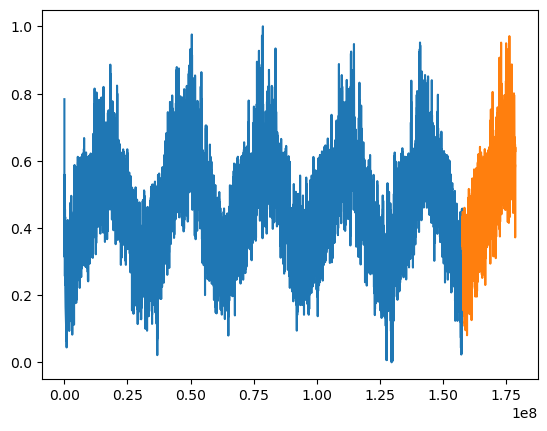

In [176]:
dropped_cols = high_corr.index
X = df_std.drop(dropped_cols, axis=1)
y = df_std['G.E_el_tot']

print(df_std.shape, X.shape)

time_thrsh = 365.25 * 24 * 60 * 60 * 5

train = df_std[df_std.index < time_thrsh]
test = df_std[df_std.index > time_thrsh]

plt.plot(train['G.air.T'])
plt.plot(test['G.air.T'])

model = LinearRegression()
model.fit(train[X.columns], train['G.E_el_tot'])

y_pred = model.predict(test[X.columns])
print(f"Mean Squared Error: {mean_squared_error(test['G.E_el_tot'], y_pred)}")
print(f"R^2 score: {r2_score(test['G.E_el_tot'], y_pred)}")

In [15]:
print(df_std)

              CHP.fluid.h  E_amb_TES  E_el_buy  G.CO2_air.CO2  G.CO2_top.CO2  \
time                                                                           
0.000000e+00     1.000000   0.778743  0.000000       1.000000       1.000000   
5.947130e+01     0.065901   0.778743  0.000000       0.614634       0.625397   
6.000000e+01     0.065867   0.778743  0.000000       0.612433       0.623069   
2.400000e+02     0.079046   0.778736  0.000000       0.253675       0.258400   
3.000000e+02     0.083526   0.778714  0.000000       0.216266       0.219703   
...                   ...        ...       ...            ...            ...   
1.787256e+08     0.030695   0.176859  0.999973       0.115536       0.116624   
1.787292e+08     0.030689   0.176859  0.999973       0.093119       0.094299   
1.787328e+08     0.030683   0.176859  0.999973       0.097174       0.098391   
1.787345e+08     0.030681   0.176859  0.999979       0.089248       0.089791   
1.787364e+08     0.030678   0.176859  1.